In [110]:
%pylab inline
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [111]:
from scipy.optimize import minimize, dual_annealing, basinhopping, differential_evolution, brute

In [112]:
import numba

In [113]:
erz = pd.read_csv("data/Realisierte_Erzeugung_202207010000_202306302359_Viertelstunde.csv", sep=";", na_values="-")

In [179]:
erz

Datum Anfang   Ende Biomasse [MWh] Originalauflösungen  \
0      01.07.2022  00:00  00:15                           1.021,25   
1      01.07.2022  00:15  00:30                           1.019,25   
2      01.07.2022  00:30  00:45                            1.012,5   
3      01.07.2022  00:45  01:00                           1.012,25   
4      01.07.2022  01:00  01:15                           1.010,25   
...           ...    ...    ...                                ...   
35035  30.06.2023  22:45  23:00                              1.119   
35036  30.06.2023  23:00  23:15                              1.116   
35037  30.06.2023  23:15  23:30                           1.114,75   
35038  30.06.2023  23:30  23:45                              1.116   
35039  30.06.2023  23:45  00:00                              1.110   

      Wasserkraft [MWh] Originalauflösungen  \
0                                     474,5   
1                                    454,25   
2                                    472,25   
3                                    480,25   
4                                    486,25   
...                                     ...   
35035                                451,25   
35036                                461,75   
35037                                454,75   
35038                                   456   
35039                                   458   

      Wind Offshore [MWh] Originalauflösungen  \
0                                      329,25   
1                                      364,75   
2                                         370   
3                                         357   
4                                         338   
...                                       ...   
35035                                  786,75   
35036                                  828,25   
35037                                   900,5   
35038                                  956,25   
35039                                  976,25   

      Wind Onshore [MWh] Originalauflösungen  \
0                                   3.455,25   
1                                   3.389,75   
2                                   3.308,25   
3                                    3.209,5   
4                                   3.135,75   
...                                      ...   
35035                                 723,75   
35036                                 809,25   
35037                                 900,75   
35038                                 992,75   
35039                                1.068,5   

      Photovoltaik [MWh] Originalauflösungen  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
35035                                      0   
35036                                      0   
35037                                      0   
35038                                      0   
35039                                      0   

      Sonstige Erneuerbare [MWh] Originalauflösungen  \
0                                                 28   
1                                                 28   
2                                                 28   
3                                                 28   
4                                                 28   
...                                              ...   
35035                                          25,25   
35036                                          25,25   
35037                                          25,25   
35038                                          25,25   
35039                                          25,25   

      Kernenergie [MWh] Originalauflösungen  \
0                                     991,5   
1                                    992,75   
2                                     992,5   
3 

In [115]:
erz_filt = erz.iloc[:, 4:9].applymap(lambda x: str(x).replace(".", "").replace(",", ".")).astype(float)

In [183]:
erz_filt

Wasserkraft [MWh] Originalauflösungen  \
0                                     474.50   
1                                     454.25   
2                                     472.25   
3                                     480.25   
4                                     486.25   
...                                      ...   
35035                                 451.25   
35036                                 461.75   
35037                                 454.75   
35038                                 456.00   
35039                                 458.00   

       Wind Offshore [MWh] Originalauflösungen  \
0                                       329.25   
1                                       364.75   
2                                       370.00   
3                                       357.00   
4                                       338.00   
...                                        ...   
35035                                   786.75   
35036                                   828.25   
35037                                   900.50   
35038                                   956.25   
35039                                   976.25   

       Wind Onshore [MWh] Originalauflösungen  \
0                                     3455.25   
1                                     3389.75   
2                                     3308.25   
3                                     3209.50   
4                                     3135.75   
...                                       ...   
35035                                  723.75   
35036                                  809.25   
35037                                  900.75   
35038                                  992.75   
35039                                 1068.50   

       Photovoltaik [MWh] Originalauflösungen  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
35035                                     0.0   
35036                                     0.0   
35037                                     0.0   
35038                                     0.0   
35039                                     0.0   

       Sonstige Erneuerbare [MWh] Originalauflösungen  
0                                               28.00  
1                                               28.00  
2                                               28.00  
3                                               28.00  
4                                               28.00  
...                                               ...  
35035                                           25.25  
35036                                           25.25  
35037                                           25.25  
35038                                           25.25  
35039                                           25.25  

[35040 rows x 5 columns]

In [117]:
inst = pd.read_csv("data/Realisierter_Stromverbrauch_202207010000_202306302359_Viertelstunde.csv", sep=";")

In [118]:
inst

Datum Anfang   Ende Gesamt (Netzlast) [MWh] Originalauflösungen  \
0      01.07.2022  00:00  00:15                                    12.157,5   
1      01.07.2022  00:15  00:30                                    11.884,5   
2      01.07.2022  00:30  00:45                                   11.710,75   
3      01.07.2022  00:45  01:00                                    11.612,5   
4      01.07.2022  01:00  01:15                                   11.471,75   
...           ...    ...    ...                                         ...   
35035  30.06.2023  22:45  23:00                                   11.624,25   
35036  30.06.2023  23:00  23:15                                   11.370,75   
35037  30.06.2023  23:15  23:30                                   11.191,75   
35038  30.06.2023  23:30  23:45                                   11.084,75   
35039  30.06.2023  23:45  00:00                                    10.926,5   

      Residuallast [MWh] Originalauflösungen  \
0                                      8.373   
1                                      8.130   
2                                    8.032,5   
3                                      8.046   
4                                      7.998   
...                                      ...   
35035                              10.113,75   
35036                               9.733,25   
35037                                9.390,5   
35038                               9.135,75   
35039                               8.881,75   

      Pumpspeicher [MWh] Originalauflösungen  
0                                      579,5  
1                                     571,25  
2                                        706  
3                                      926,5  
4                                     728,25  
...                                      ...  
35035                                 116,25  
35036                                   14,5  
35037                                  92,25  
35038                                  113,5  
35039                                    218  

[35040 rows x 6 columns]

In [119]:
inst_filt = inst.iloc[:, 3:].applymap(lambda x: str(x).replace(".", "").replace(",", ".")).astype(float)
inst_filt = inst_filt.iloc[:, 0]

In [120]:
ee = erz_filt.sum(axis=1).to_numpy()

In [121]:
ii = inst_filt.to_numpy()

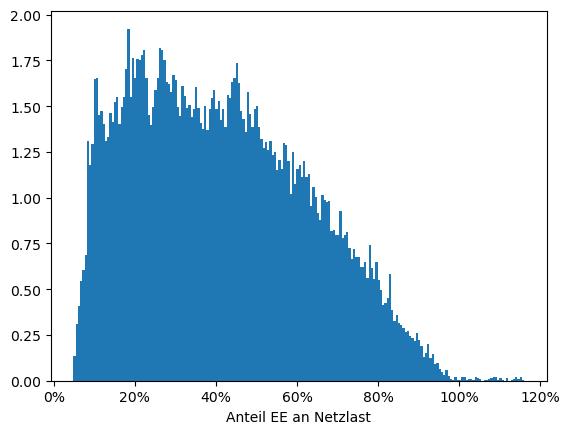

In [122]:
hist(ee/ii, bins=200, density=True);
xlabel("Anteil EE an Netzlast")
gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

Text(0.5, 0, 'Viertelstündliches Energiedefizit / GWh')

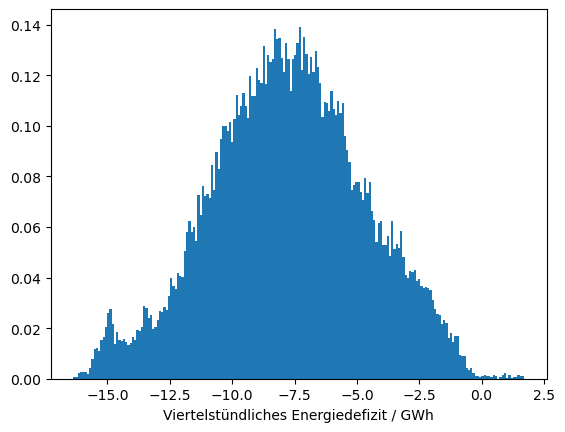

In [123]:
hist((ee-ii)/1000., bins=200, density=True)
xlabel("Viertelstündliches Energiedefizit / GWh")
#gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

In [203]:
erz_solar2 = erz_filt.copy()
erz_solar2.iloc[:, 3] *= 2
ee_solar2 = erz_solar2.sum(axis=1).to_numpy()

In [204]:
erz_solar4 = erz_filt.copy()
erz_solar4.iloc[:, 3] *= 4
ee_solar4 = erz_solar4.sum(axis=1).to_numpy()

In [205]:
erz_all2 = erz_filt.copy()
erz_all2.iloc[:, :] *= 2
ee_all2 = erz_all2.sum(axis=1).to_numpy()

In [206]:
erz_all4 = erz_filt.copy()
erz_all4.iloc[:, :] *= 4
ee_all4 = erz_all4.sum(axis=1).to_numpy()

In [207]:
erz_wind2 = erz_filt.copy()
erz_wind2.iloc[:, 1] *= 2
erz_wind2.iloc[:, 2] *= 2
ee_wind2 = erz_wind2.sum(axis=1).to_numpy()

In [208]:
erz_wind4 = erz_filt.copy()
erz_wind4.iloc[:, 1] *= 4
erz_wind4.iloc[:, 2] *= 4
ee_wind4 = erz_wind4.sum(axis=1).to_numpy()

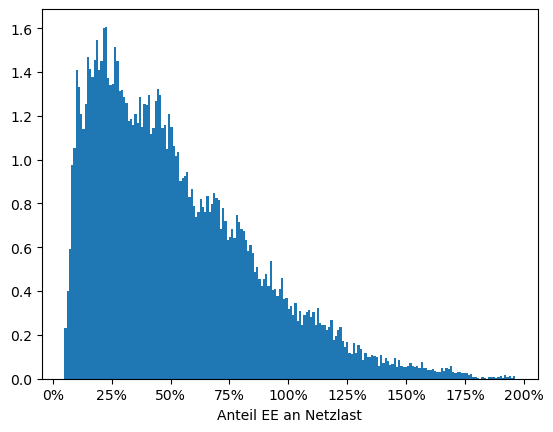

In [128]:
hist(ee_solar4/ii, bins=200, density=True);
xlabel("Anteil EE an Netzlast")
gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

Text(0.5, 0, 'Viertelstündliches Energiedefizit / GWh')

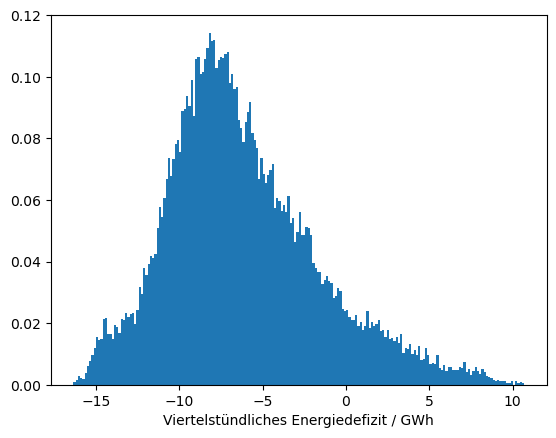

In [129]:
hist((ee_solar4-ii)/1000., bins=200, density=True)
xlabel("Viertelstündliches Energiedefizit / GWh")
#gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

Text(0.5, 1.0, 'Erneuerbare Energien, Deutschland 2023')

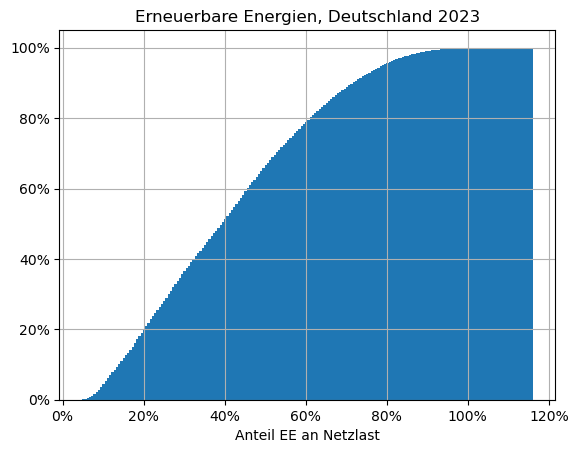

In [130]:
hist(ee/ii, bins=200, density=True, cumulative=True)
xlabel("Anteil EE an Netzlast")
gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
grid()
title("Erneuerbare Energien, Deutschland 2023")

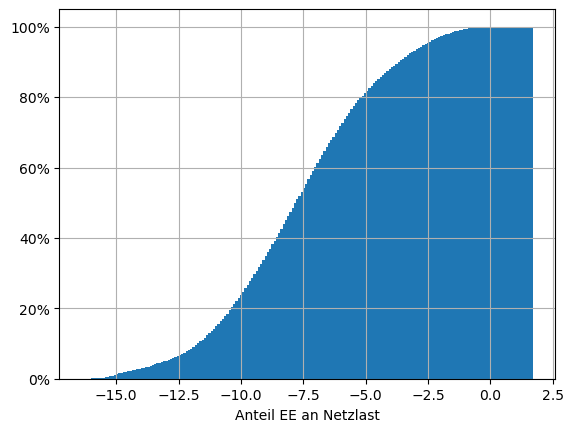

In [131]:
hist((ee-ii)/1000, bins=200, density=True, cumulative=True)
xlabel("Anteil EE an Netzlast")
#gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
grid()

Text(0.5, 1.0, 'Erneuerbare Energien, Solar x 4, Deutschland 2023')

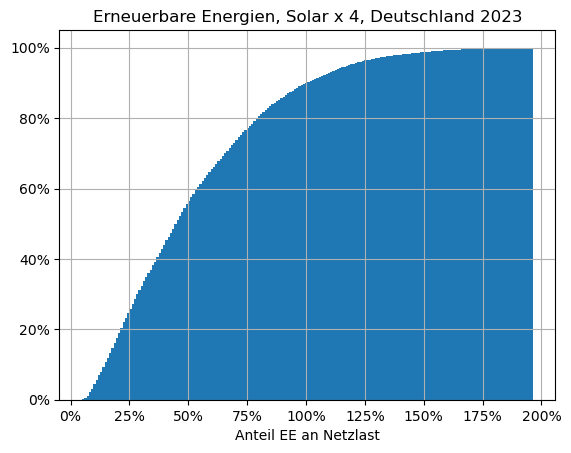

In [132]:
hist(ee_solar4/ii, bins=200, density=True, cumulative=True)
xlabel("Anteil EE an Netzlast")
gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
grid()
title("Erneuerbare Energien, Solar x 4, Deutschland 2023")

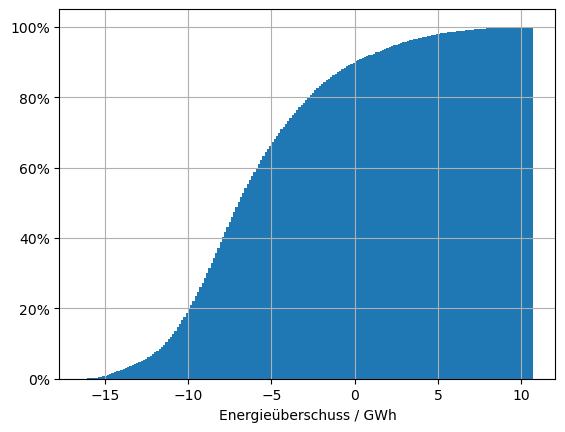

In [133]:
hist((ee_solar4-ii)/1000, bins=200, density=True, cumulative=True)
xlabel("Energieüberschuss / GWh")
#gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
grid()

Text(0.5, 1.0, 'Erneuerbare Energien, EE x 4, Deutschland 2023')

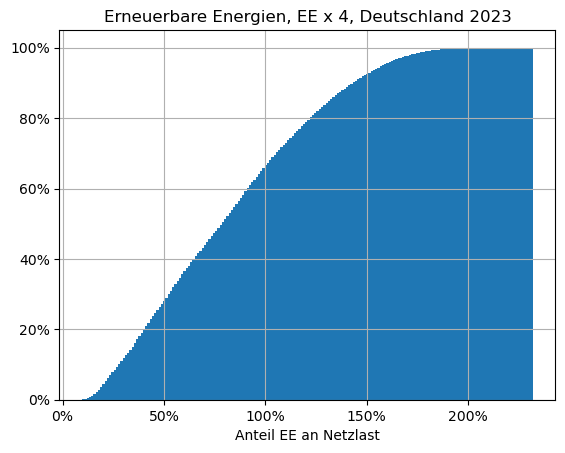

In [134]:
hist(ee_all4/ii, bins=200, density=True, cumulative=True)
xlabel("Anteil EE an Netzlast")
gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
grid()
title("Erneuerbare Energien, EE x 4, Deutschland 2023")

In [191]:
def surv_cs_ratio(x, y, labels, bins=200):
    for yy, label in zip(y, labels):
        H, b = histogram(yy/x, bins=bins, density=True)
        b2 = (b[1:] + b[:-1])/2
        integ = 1 - H.cumsum() * diff(b)
        plot(b2, integ, label=label)
        
    xlabel("Anteil EE an Netzlast")
    ylabel("Anteil Viertelstunden mit mind. X% EE-Anteil")
    gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
    gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
    gca().xaxis.set_minor_locator(MultipleLocator(0.1))
    gca().yaxis.set_minor_locator(MultipleLocator(0.1))
    grid(which='both', alpha=0.5)
    title("Erneuerbare Energien, Juli 2022 - Juni 2023")
    axvline(1, color='k', alpha=0.5, ls='--')
    legend()

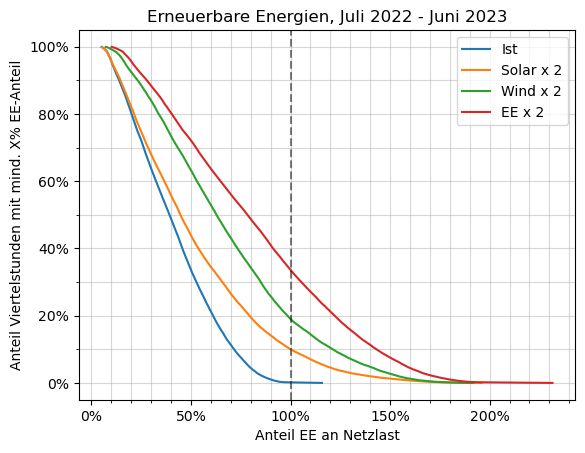

In [209]:
surv_cs_ratio(ii, [ee, ee_solar2, ee_wind2, ee_all2], ["Ist", "Solar x 2", "Wind x 2", "EE x 2"])

In [229]:
def surv_hist_ratio(x, y, labels, bins=200):
    for yy, label in zip(y, labels):
        H, b = histogram(yy/x, bins=bins, density=True)
        b2 = (b[1:] + b[:-1])/2
        plot(b2, H, label=label)
        
    xlabel("Anteil EE an Netzlast")
    ylabel("Wahrscheinlichkeitsdichte")
    gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
    gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
    #gca().xaxis.set_minor_locator(MultipleLocator(0.1))
    #gca().yaxis.set_minor_locator(MultipleLocator(0.1))
    grid(which='both', alpha=0.5)
    title("Erneuerbare Energien, Juli 2022 - Juni 2023")
    axvline(1, color='k', alpha=0.5, ls='--')
    legend()

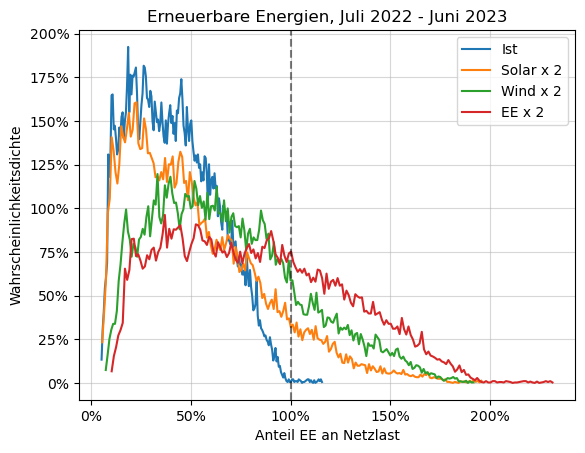

In [230]:
surv_hist_ratio(ii, [ee, ee_solar2, ee_wind2, ee_all2], ["Ist", "Solar x 2", "Wind x 2", "EE x 2"])

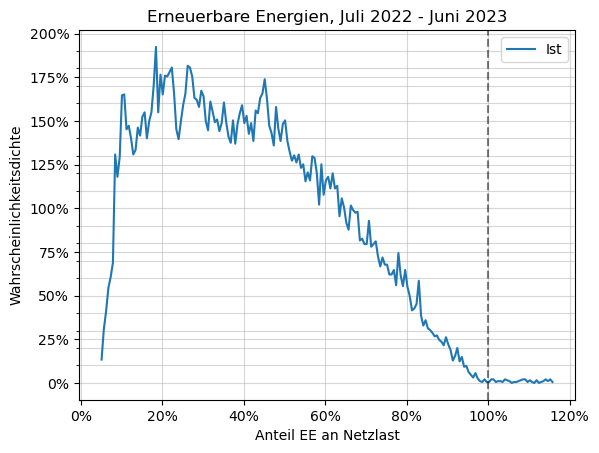

In [228]:
surv_hist_ratio(ii, [ee], ["Ist"])

In [243]:
def surv_cs_diff(x, y, labels, bins=200):
    for yy, label in zip(y, labels):
        H, b = histogram((yy-x)/1000, bins=bins, density=True)
        b2 = (b[1:] + b[:-1])/2
        integ = 1 - H.cumsum() * diff(b)
        plot(b2, integ, label=label)
    
    xlabel("Viertelstündlicher EE-Überschuss / GWh")#
    ylabel("Anteil Viertelstunden mit mind. X GWh EE-Überschuss")
    #gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
    gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
    #gca().xaxis.set_minor_locator(MultipleLocator(1))
    gca().yaxis.set_minor_locator(MultipleLocator(0.1))
    grid(which='both', alpha=0.5)
    title("Erneuerbare Energien, Juli 2022 - Juni 2023")
    axvline(0, color='k', alpha=0.5, ls='--')
    legend()

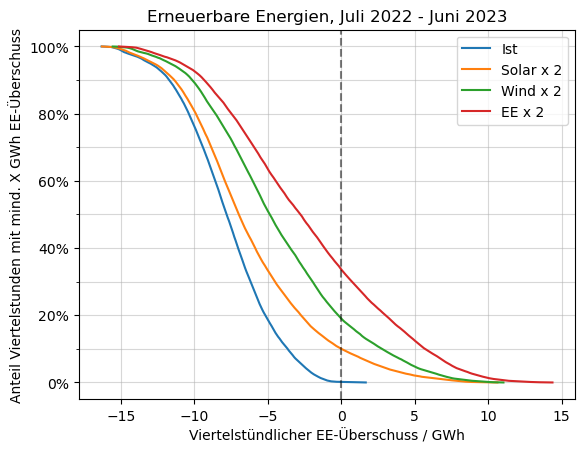

In [244]:
surv_cs_diff(ii, [ee, ee_solar2, ee_wind2, ee_all2], ["Ist", "Solar x 2", "Wind x 2", "EE x 2"])

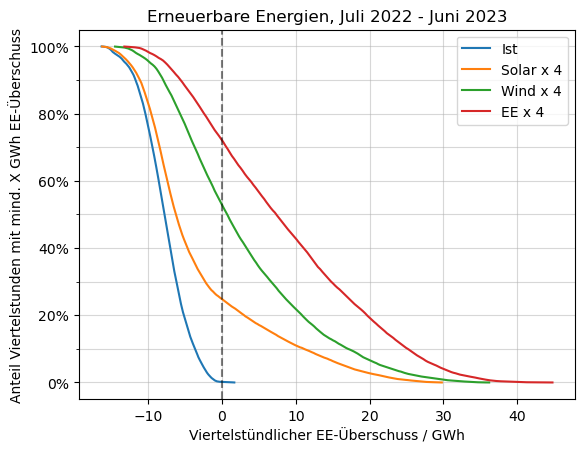

In [247]:
surv_cs_diff(ii, [ee, ee_solar4, ee_wind4, ee_all4], ["Ist", "Solar x 4", "Wind x 4", "EE x 4"])

In [245]:
def surv_hist_diff(x, y, labels, bins=200):
    for yy, label in zip(y, labels):
        H, b = histogram((yy-x)/1000, bins=bins, density=True)
        b2 = (b[1:] + b[:-1])/2
        #integ = 1 - H.cumsum() * diff(b)
        plot(b2, H, label=label)
    
    xlabel("Viertelstündlicher EE-Überschuss / GWh")#
    ylabel("Wahrscheinlichkeitsdichte / GWh$^{-1}$")
    #gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
    gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
    #gca().xaxis.set_minor_locator(MultipleLocator(1))
    #gca().yaxis.set_minor_locator(MultipleLocator(0.1))
    grid(which='both', alpha=0.5)
    title("Erneuerbare Energien, Juli 2022 - Juni 2023")
    axvline(0, color='k', alpha=0.5, ls='--')
    legend()

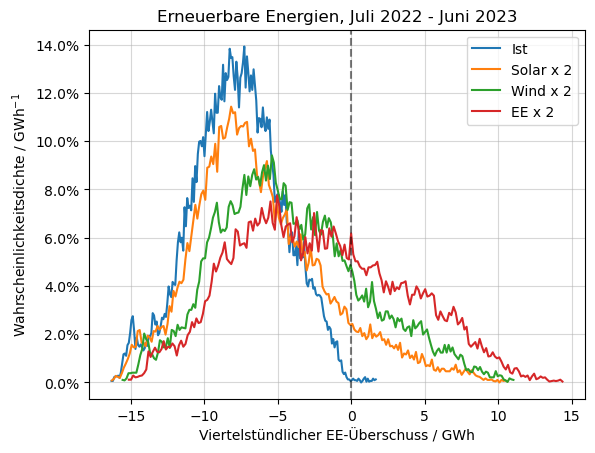

In [246]:
surv_hist_diff(ii, [ee, ee_solar2, ee_wind2, ee_all2], ["Ist", "Solar x 2", "Wind x 2", "EE x 2"])

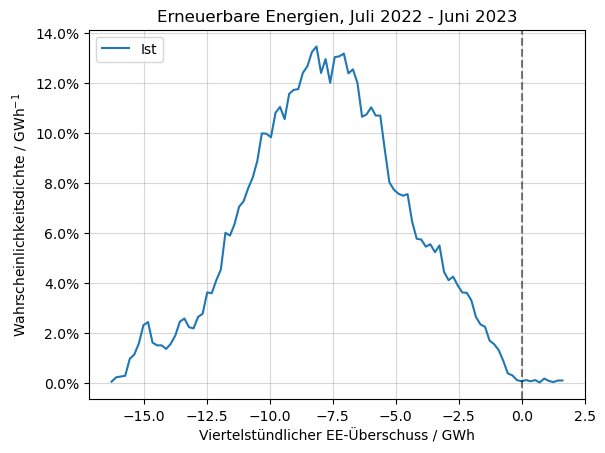

In [241]:
surv_hist_diff(ii, [ee], ["Ist"], bins=100)

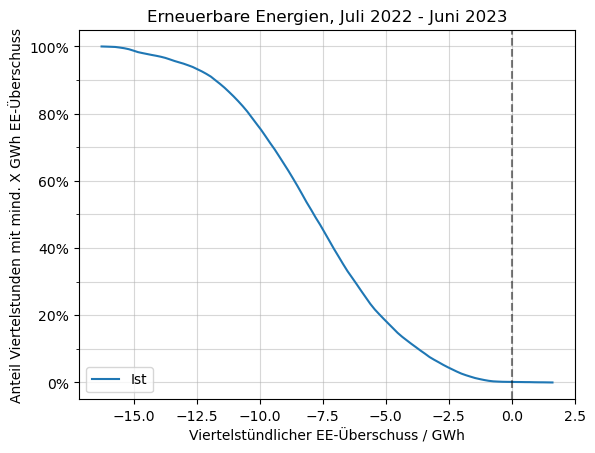

In [242]:
surv_cs_diff(ii, [ee], ["Ist"], bins=100)

In [234]:
@numba.njit
def limited_cumsum(x, limit=np.inf, start=0):
    first = x[0] + start
    r = [first if first < limit else limit]
    for xx in x[1:]:
        n = r[-1] + xx
        if n > limit:
            n = limit
        r.append(n)
    return array(r)

In [264]:
def plot_limit(x, y, limit=0, start=0, label="EE"):
    plot(limited_cumsum((y-1.*x)/1e6, limit=limit, start=start), label=f"{label}, {limit:.3f} TWh Speicher")
    ylabel("Überschuss / TWh")
    xlabel("Viertelstunden seit 1.7.2022")
    grid()
    title("Erneuerbare Energien, Juli 2022 - Juni 2023")
    legend()

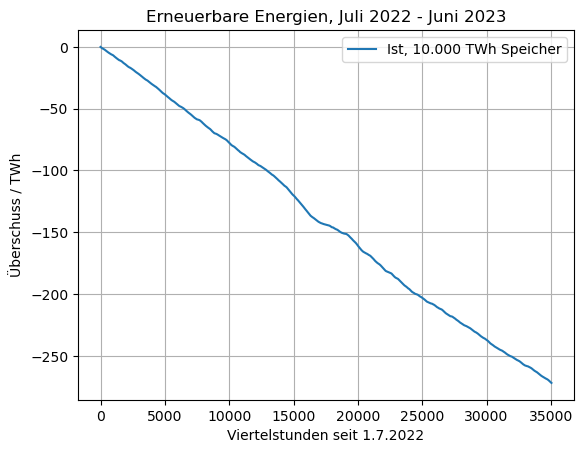

In [265]:
plot_limit(ii, ee, limit=10, label="Ist")

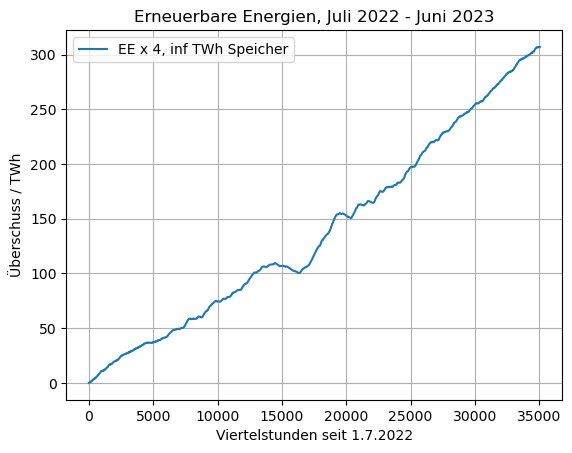

In [269]:
plot_limit(ii, ee * 4, limit=inf, label="EE x 4")

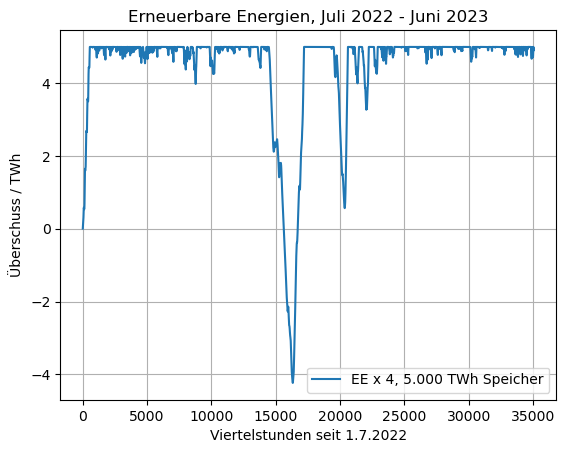

In [270]:
plot_limit(ii, ee*4, limit=5, label="EE x 4")

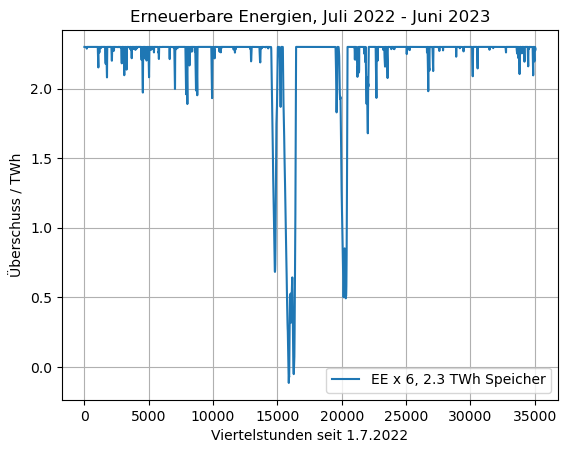

In [174]:
plot_limit(ii, ee*(i:=6), limit=2.3, label=f"EE x {i}")

In [153]:
def fun(x, *args):
    scale, storage = x
    storage *= 1e6
    ii, ee = args
    return log(abs(limited_cumsum(ee*scale - 1.*ii, limit=storage, start=storage).min()))

In [144]:
dual_annealing(fun, bounds=[(4, 10), (3, 12)], args=(ii, ee), maxiter=1500)

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 0.0021536924250540324
       x: [ 4.361e+00  7.587e+00]
     nit: 1500
    nfev: 19136
    njev: 4378
    nhev: 0

In [271]:
a = arange(0, 12, 0.1)
b = arange(0, 12, 0.1)
c = zeros((a.size, b.size))

for i in range(a.size):
    for j in range(b.size):
        c[i,j] = fun((a[i], b[j]), ii, ee)

Text(0, 0.5, 'Speicher / TWh')

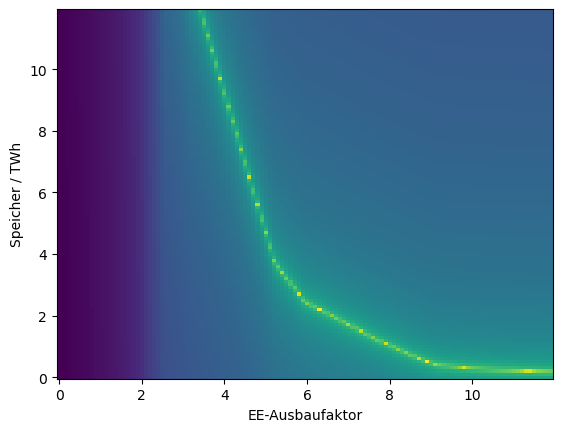

In [272]:
pcolormesh(a, b, 1-c.T)
xlabel("EE-Ausbaufaktor")
ylabel("Speicher / TWh")